In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("../data/WA_Fn_UseC_Telco_Customer_Churn.csv")
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df.drop("customerID", axis=1, inplace=True)

#  Encodage pour certaines visualisations
df_encoded = pd.get_dummies(df, drop_first=True)


df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_25808\362265534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette=["green", "red"])


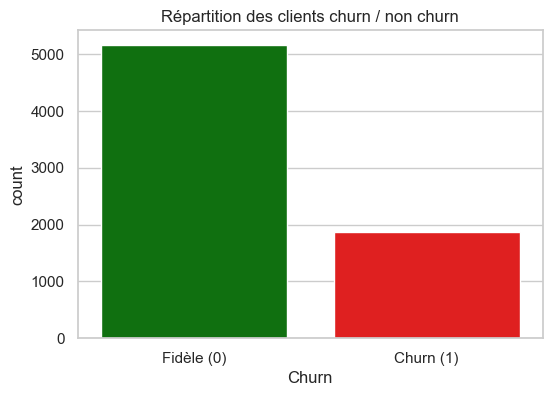

In [2]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette=["green", "red"])
plt.title("Répartition des clients churn / non churn")
plt.xticks([0, 1], ["Fidèle (0)", "Churn (1)"])
plt.show()


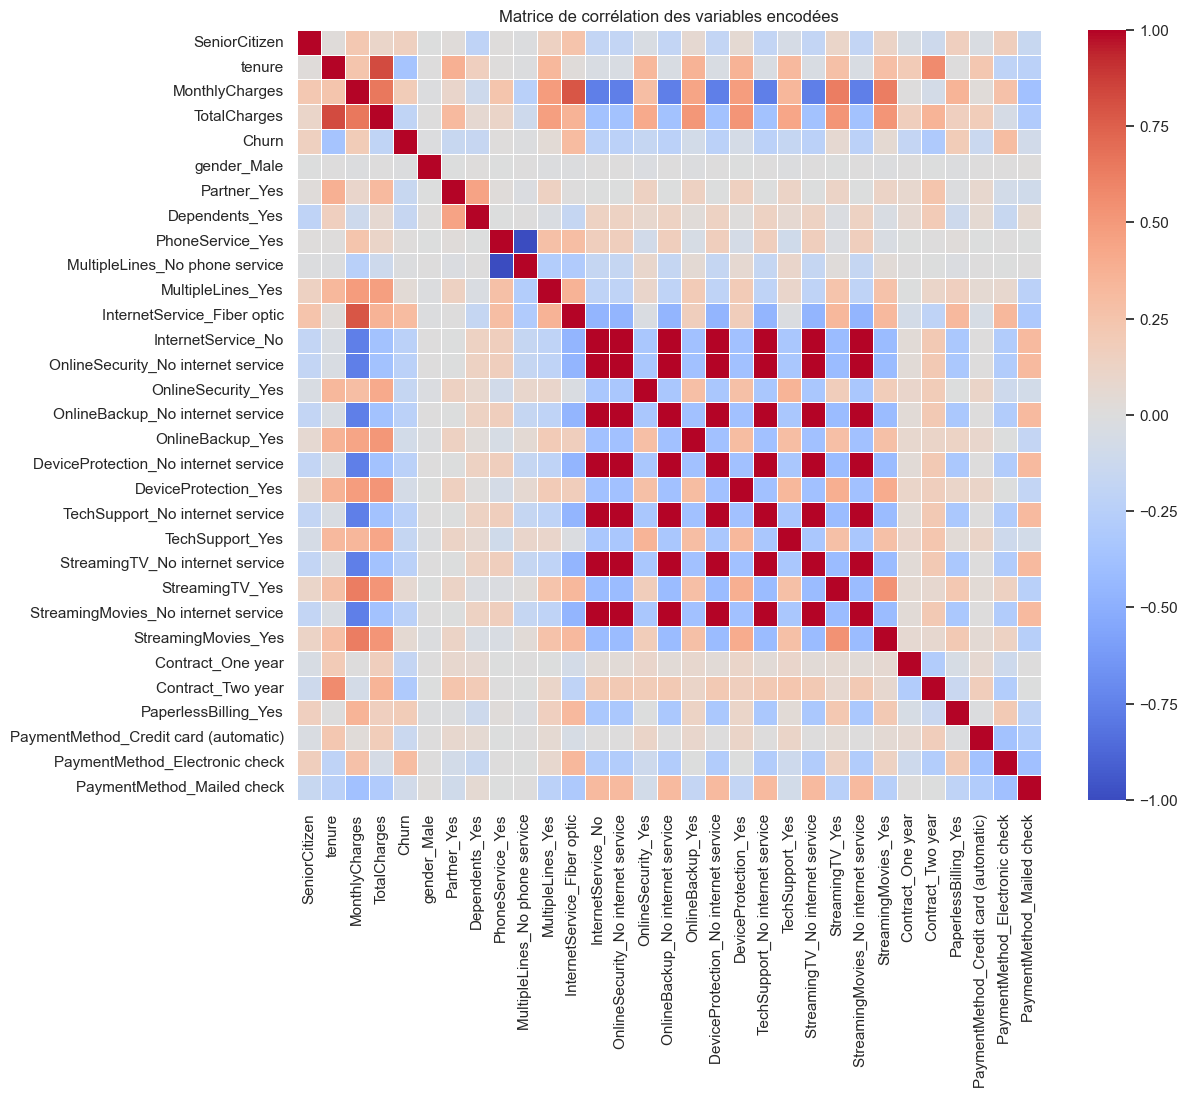

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matrice de corrélation des variables encodées")
plt.show()


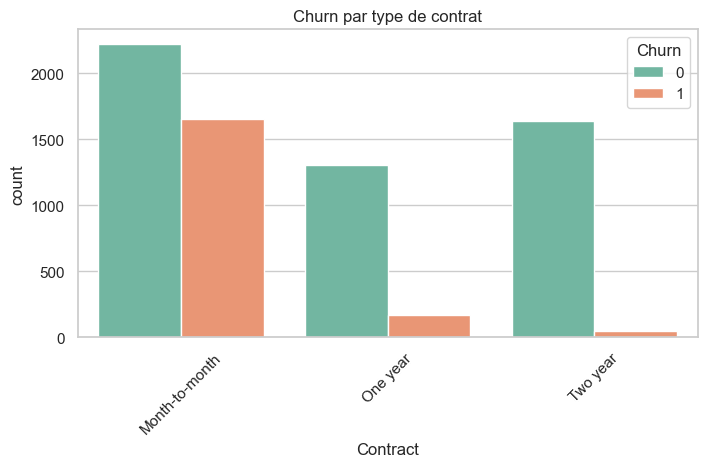

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Contract", hue="Churn", palette="Set2")
plt.title("Churn par type de contrat")
plt.xticks(rotation=45)
plt.show()


C:\Users\HP-ELITEBOOK\AppData\Local\Temp\ipykernel_25808\409628859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="TotalCharges", palette=["green", "red"])


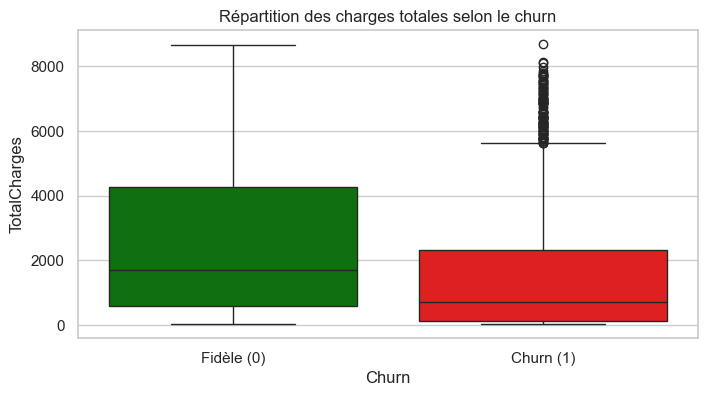

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette=["green", "red"])
plt.title("Répartition des charges totales selon le churn")
plt.xticks([0, 1], ["Fidèle (0)", "Churn (1)"])
plt.show()


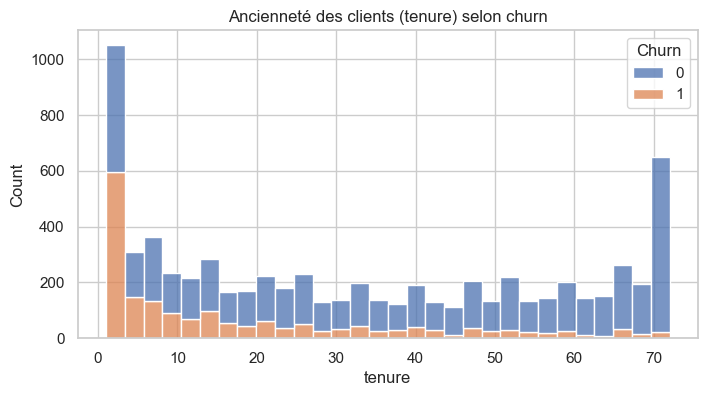

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Ancienneté des clients (tenure) selon churn")
plt.show()


In [7]:
fig = px.pie(df, names="Churn", title="Répartition du Churn", color="Churn",
             color_discrete_map={0: "green", 1: "red"},
             labels={0: "Fidèle", 1: "Churn"})
fig.show()


In [8]:
fig = px.histogram(df, x="InternetService", color="Churn", barmode="group",
                   title="Churn par type d'internet", labels={"Churn": "Churn"})
fig.show()


In [9]:
fig = px.sunburst(df, path=["Contract", "InternetService", "Churn"],
                  color="Churn", maxdepth=3,
                  color_continuous_scale=["green", "red"],
                  title="Churn par contrat et type d'internet")
fig.show()
